# Generate data set

In [105]:
import sys
sys.path.append('NgsimExtractor')
del sys.modules['NgsimExtractor']    # for revision and reload
from NgsimExtractor import NgsimExtractor

# example: read the data
location = "\"us-101\"" ;    gap = 100
NGE = NgsimExtractor(location, gap)
dfSet = NGE.extractData()
dfSet.to_csv('traUs101Gap01s.csv', index = False)

begin init
end init
gap=10000
location = "us-101"
datasize=48037  limit=1000000


In [98]:
df = dfSet[dfSet['lane_id'] == 6]
df

,unit_id,vehicle_id,global_time,date_time,t_diff,latitude,longitude,local_y,v_vel,v_class,lane_id,frame_id,total_frames,location
16131,6,5,1113433150000,2005-04-13 15:59:10,13,39.341758,-119.828491,30.700370,16.881814,2,6,151,702,i-80
37420,6,5,1113433160000,2005-04-13 15:59:20,23,39.342377,-119.828596,100.211230,10.227270,2,6,251,702,i-80
27201,6,5,1113433170000,2005-04-13 15:59:30,33,39.342498,-119.828616,113.771172,0.000000,2,6,351,702,i-80
14644,6,5,1113433190000,2005-04-13 15:59:50,53,39.343588,-119.828811,236.235850,13.090906,2,6,551,702,i-80
41340,6,5,1113433200000,2005-04-13 16:00:00,63,39.344126,-119.828938,296.762424,20.427267,2,6,651,702,i-80
33120,6,5,1113433210000,2005-04-13 16:00:10,73,39.345051,-119.829147,401.056754,25.595448,2,6,751,702,i-80
25959,8,6,1113437620000,2005-04-13 17:13:40,4483,39.341889,-119.828520,45.469759,7.677271,2,6,551,1131,i-80
44278,8,6,1113437630000,2005-04-13 17:13:50,4493,39.342114,-119.828562,70.822414,6.818180,2,6,651,1131,i-80
36544,8,6,1113437640000,2005-04-13 17:14:00,4503,39.342419,-119.828616,105.068218,7.397725,2,6,751,1131,i-80
37133,8,6,1113437650000,2005-04-13 17:14:10,4513,39.342693,-119.828666,135.949944,6.818180,2,6,851,1131,i-80


# Visulization

#### Visulization - Raw location at one time

In [95]:
# do some visualization
from gmplot import gmplot
#Place the map
gmap = gmplot.GoogleMapPlotter( dfSet.loc[0,'latitude'], dfSet.loc[0,'longitude'], 13) # (latitude, longitude, layer)

# the vehicles at one specific time

lats = tuple(dfSet['latitude'])
lngs = tuple(dfSet['longitude'])
gmap.scatter(lngs, lats,'#3B0B39', size=1, marker=False)
gmap.draw("RawLocationAtOneTime_i-80.html")

#### Visulization - local_y-T

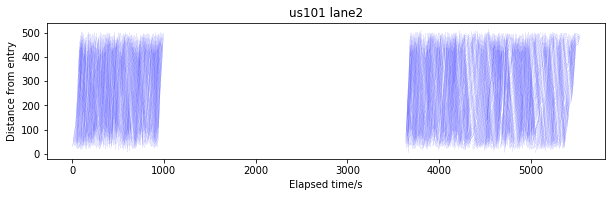

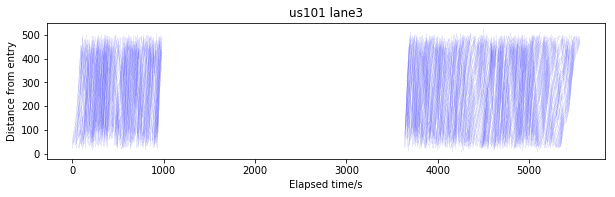

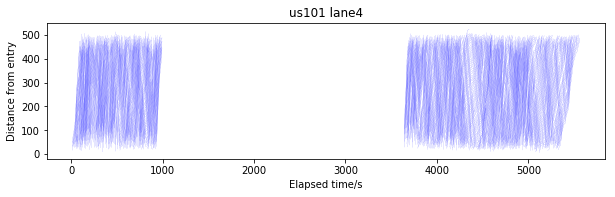

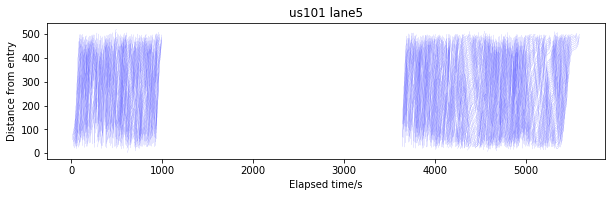

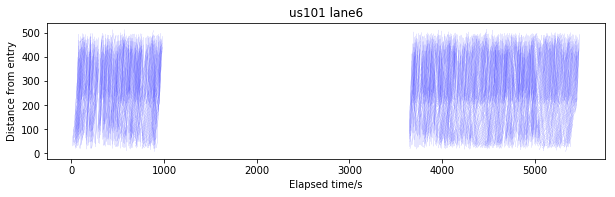

In [100]:
from matplotlib import pyplot as plt
theLaneId = []
for lane_id in range(2,7):
    df = dfSet[dfSet['lane_id'] == lane_id]
    plt.figure(figsize = (10,2.5))
    nLine = max(df['unit_id'])
    for i in range(1, nLine + 1):
        toplot = df[df['unit_id'] == i]
        plt.plot( toplot['t_diff'].astype(int), toplot['local_y'].astype(float), linewidth = 0.1, color = 'b' )
    plt.xlabel('Elapsed time/s')
    plt.ylabel('Distance from entry')
    plt.title('us101 lane{}'.format(lane_id))
    #plt.show()
    plt.savefig('traffi_flow_lane{}_i80_gap10s.png'.format(lane_id), bbox_inches = 'tight' ,dpi = 1000)

In [13]:
plt.show()

#### Visulization - Time-Space mean velocity

In [106]:
#from matplotlib.colors import LinearSegmentedColormap
sys.path.append('./project_figure')
import copy
del sys.modules['DrawSptTempMeanVel']    # for revision and reload
from DrawSptTempMeanVel import DrawSptTempMeanVel

# copy the data from dfSet
for i in range(1,2):
    theLaneId = i
    df = copy.copy(dfSet)

    # class Drawxxxxxx
    VelMapper = DrawSptTempMeanVel(df)

    # set lane id
    laneId = VelMapper.SetLaneId(theLaneId)

    # compute and plot
    mapMat = VelMapper.GetSpatialTemperalMap(spatialLevel = 50, temperalLevel = 100)
    #VelMapper.heatmap(filename='v_map_Class_Us101_lane' + str(theLaneId) +'.png')


temperalGrid: (0.0, 2743.29, 27.71)
sptialGrid: (3.1863792, 663.3932629279999, 13.473609871999997)


./project_figure\DrawSptTempMeanVel.py:101: RuntimeWarning: invalid value encountered in double_scalars
  mapMat[spaceIdx, timeIdx] = meanVel


In [57]:
max(dfSet[dfSet['lane_id']==2]['v_vel'])

11.27796571491549

In [108]:
# find the minimal time of the differnet road
location = "\"i-80\""
gap = 10000
NGE = NgsimExtractor( location, gap )
dfSet = NGE.extractData()

begin init
end init
gap=10000
location = "i-80"
datasize=45647  limit=1000000


In [143]:
dfSet

,unit_id,vehicle_id,global_time,date_time,t_diff,latitude,longitude,local_y,v_vel,v_class,lane_id,frame_id,total_frames,location
36282,1,1,1118847870000,2005-06-15 08:04:30,890,38.642462,-118.386049,40.367712,12.020451,3,5,280,569,us-101
28761,1,1,1118847880000,2005-06-15 08:04:40,900,38.642002,-118.385484,110.412886,16.847723,3,5,380,569,us-101
37493,1,1,1118847890000,2005-06-15 08:04:50,910,38.641477,-118.384738,197.303136,22.738630,3,5,480,569,us-101
33190,1,1,1118847900000,2005-06-15 08:05:00,920,38.640974,-118.383994,282.842818,19.281813,3,5,580,569,us-101
46050,1,1,1118847910000,2005-06-15 08:05:10,930,38.640282,-118.382992,399.352313,31.302264,3,5,680,569,us-101
37144,1,1,1118847920000,2005-06-15 08:05:20,940,38.639353,-118.381641,555.874733,38.802262,3,5,780,569,us-101
14605,2,1,1118848780000,2005-06-15 08:19:40,1800,38.642093,-118.385612,93.709236,17.693177,2,5,230,421,us-101
36319,2,1,1118848790000,2005-06-15 08:19:50,1810,38.641557,-118.384869,181.091129,21.027267,2,5,330,421,us-101
40301,2,1,1118848800000,2005-06-15 08:20:00,1820,38.641004,-118.384046,275.524265,23.168176,2,5,430,421,us-101
25047,2,1,1118848810000,2005-06-15 08:20:10,1830,38.640215,-118.382976,403.600920,32.965900,2,6,530,421,us-101


#### Visulization - Density-Flow figure

In [177]:
# def tpinit():
cellWindow_s = [x for x in range(25-4 , 25+4  +1 )]
initSpatial = 3.1863792
distSpatial = 13.473609871999997
initTemperal = 0.0
diffTemperal = 27.71
spatialWindow = [initSpatial + cellWindow[0] * distSpatial, initSpatial + cellWindow[1] * distSpatial]
L = (spatialWindow[1] - spatialWindow[0]) * 0.000621371


In [131]:
import numpy as np

In [193]:
lane_id = 2
df = dfSet[dfSet['lane_id'] == lane_id]
q_rou = np.zeros( (mapMat.shape[1]-1,2) )   # ??? shall we -1? 
for idx_time in range(mapMat.shape[1]-1):
    cellWindow_t = [idx_time]
    timeWindow = [ initSpatial + idx_time*diffTemperal, initSpatial + (idx_time+1)*diffTemperal  ]
    
    # time travel
    tt = diffTemperal
    subMapMat = mapMat[cellWindow_s, cellWindow_t]
    subMapMat = subMapMat[~np.isnan(subMapMat)]
    if np.
    
    # average speed
    aveSpeed = sum(subMapMat)/len(subMapMat)
    
    # average number of vehicles
    mask_t = (df['t_diff'] >= timeWindow[0]) & (df['t_diff'] < timeWindow[1]) 
    mask_s = (df['local_y'] >= spatialWindow[0]) & (df['local_y'] < spatialWindow[1])
    sub_df = df.loc[(mask_t&mask_s),:]
    N_unitId = sub_df[['unit_id']].drop_duplicates('unit_id').count()
    rou = N_unitId/L/1 # 1 is the sample time, change later
    
    # q
    q = aveSpeed * rou
    
    #
    q_rou[idx_time,0] = q
    q_rou[idx_time,1] = rou
    
    
    

ZeroDivisionError: division by zero

In [192]:
q_rou
q_rou_noN = q_rou[~np.isnan(q_rou[:,0]), :]
q_rou

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

In [180]:
q

unit_id    3344.300863
dtype: float64

In [142]:
aveSpeed = sum(subMapMat)/len(subMapMat)
L

6.697688351819608

In [172]:
mask_t = (df['t_diff'] >= timeWindow[0]) & (df['t_diff'] < timeWindow[1]) 
mask_s = (df['local_y'] >= spatialWindow[0]) & (df['local_y'] < spatialWindow[1])
sub_df = df.loc[(mask_t&mask_s),:]
N_unitId = sub_df[['unit_id']].drop_duplicates('unit_id').count()
sub_df

,unit_id,vehicle_id,global_time,date_time,t_diff,latitude,longitude,local_y,v_vel,v_class,lane_id,frame_id,total_frames,location
8774,169,64,1118847020000,2005-06-15 07:50:20,40,38.640528,-118.383174,357.081125,35.338627,2,2,411,414,us-101
485,186,71,1118847020000,2005-06-15 07:50:20,40,38.640718,-118.383453,324.848525,30.088628,2,2,411,489,us-101
11602,207,78,1118847020000,2005-06-15 07:50:20,40,38.640908,-118.383733,292.514731,34.084082,2,2,411,473,us-101
17600,246,94,1118847030000,2005-06-15 07:50:30,50,38.640327,-118.382874,391.493654,32.836355,2,2,511,459,us-101
27580,275,105,1118847030000,2005-06-15 07:50:30,50,38.640482,-118.383102,365.221418,30.695446,2,2,511,460,us-101
26097,301,116,1118847030000,2005-06-15 07:50:30,50,38.640604,-118.383297,343.412064,30.668174,2,2,511,455,us-101
30208,313,120,1118847030000,2005-06-15 07:50:30,50,38.640758,-118.383513,317.946634,31.111355,2,2,511,456,us-101
26027,332,127,1118847030000,2005-06-15 07:50:30,50,38.640879,-118.383678,298.258382,30.102265,2,2,511,455,us-101


In [188]:
subMapMat = mapMat[cellWindow_s, cellWindow_t]
#subMapMat = subMapMat[~np.isnan(subMapMat)]
subMapMat

array([nan, nan, nan, nan, nan, nan, nan, nan, nan])